<a href="https://colab.research.google.com/github/ss1705/ai-traffic-system/blob/main/Seatbelt%20Detection/Seatbelt_Detect_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics roboflow opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="f83hmp9djxTjyj2lVChy")
project = rf.workspace("traffic-violations").project("seatbelt-detection-esut6")
version = project.version(5)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Seatbelt-Detection-5 in yolov8:: 100%|██████████| 10594/10594 [00:01<00:00, 6346.28it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO("yolov8m.pt")

model.train(data="/content/Seatbelt-Detection-5/data.yaml",
            epochs=50,
            imgsz=640,
            batch=4,
            workers=4,
            project="seatbelt_yolo_training",
            name="yolov8_seatbelt",
            save=True)

100%|██████████| 49.7M/49.7M [00:00<00:00, 217MB/s]


Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Seatbelt-Detection-5/data.yaml, epochs=50, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=seatbelt_yolo_training, name=yolov8_seatbelt, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

100%|██████████| 755k/755k [00:00<00:00, 101MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 200MB/s]


AMP: checks passed ✅


train: Scanning /content/Seatbelt-Detection-5/train/labels... 3769 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3769/3769 [00:01<00:00, 2088.53it/s]


train: New cache created: /content/Seatbelt-Detection-5/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 11734. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Seatbelt-Detection-5/valid/labels... 1070 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1070/1070 [00:00<00:00, 1563.40it/s]


val: New cache created: /content/Seatbelt-Detection-5/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3, len(boxes) = 3318. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to seatbelt_yolo_training/yolov8_seatbelt/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to seatbelt_yolo_training/yolov8_seatbelt
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.25G      1.488      1.538      1.527          4        640: 100%|██████████| 943/943 [02:43<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:18<00:00,  7.41it/s]


                   all       1070       3318      0.698      0.713      0.739       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.09G      1.487      1.301      1.502          1        640: 100%|██████████| 943/943 [02:40<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.25it/s]


                   all       1070       3318      0.774      0.723      0.783      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.09G      1.441      1.195      1.457          3        640: 100%|██████████| 943/943 [02:36<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  7.90it/s]

                   all       1070       3318      0.763      0.781      0.794      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.09G      1.401      1.121      1.437          6        640: 100%|██████████| 943/943 [02:40<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:17<00:00,  7.75it/s]


                   all       1070       3318      0.773      0.816      0.838      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.08G      1.339      1.022      1.388          7        640: 100%|██████████| 943/943 [02:38<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:17<00:00,  7.78it/s]

                   all       1070       3318      0.821      0.792      0.846      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.08G       1.32     0.9681      1.378          6        640: 100%|██████████| 943/943 [02:40<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:17<00:00,  7.82it/s]

                   all       1070       3318       0.86       0.82      0.879      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.09G      1.284      0.919       1.35          2        640: 100%|██████████| 943/943 [02:36<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  7.98it/s]

                   all       1070       3318      0.859      0.836      0.889      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.09G      1.275     0.9014       1.34          2        640: 100%|██████████| 943/943 [02:36<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.26it/s]

                   all       1070       3318      0.845      0.869      0.899      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.09G      1.257      0.868      1.327          3        640: 100%|██████████| 943/943 [02:36<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.11it/s]

                   all       1070       3318      0.885      0.848      0.908       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.09G      1.231     0.8392       1.31          5        640: 100%|██████████| 943/943 [02:37<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  7.95it/s]

                   all       1070       3318      0.858       0.85      0.893      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.03G      1.227     0.8364      1.306          2        640: 100%|██████████| 943/943 [02:38<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  7.94it/s]

                   all       1070       3318      0.878       0.86      0.911      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.1G      1.218     0.8115      1.305          9        640: 100%|██████████| 943/943 [02:37<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.11it/s]

                   all       1070       3318      0.882      0.863      0.907      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.1G      1.197     0.7885      1.295          5        640: 100%|██████████| 943/943 [02:35<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  7.90it/s]

                   all       1070       3318      0.892      0.878      0.922      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.09G      1.187     0.7766      1.289          0        640: 100%|██████████| 943/943 [02:35<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.00it/s]

                   all       1070       3318      0.894      0.876      0.916      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.08G      1.166     0.7439      1.269          0        640: 100%|██████████| 943/943 [02:37<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:17<00:00,  7.72it/s]

                   all       1070       3318      0.889      0.877      0.918      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.08G      1.162     0.7372      1.269          1        640: 100%|██████████| 943/943 [02:39<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.16it/s]

                   all       1070       3318      0.906      0.893      0.929      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.08G      1.159     0.7261      1.264          7        640: 100%|██████████| 943/943 [02:38<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.05it/s]

                   all       1070       3318      0.898      0.891      0.933      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.09G      1.151     0.7281      1.264          7        640: 100%|██████████| 943/943 [02:40<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.11it/s]

                   all       1070       3318      0.912      0.898      0.939      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.08G      1.129     0.6898      1.248          2        640: 100%|██████████| 943/943 [02:38<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.12it/s]

                   all       1070       3318      0.898      0.898       0.93      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.08G      1.121     0.6981      1.245          3        640: 100%|██████████| 943/943 [02:37<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.01it/s]

                   all       1070       3318      0.909      0.895       0.93      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.09G      1.122     0.6873      1.247          2        640: 100%|██████████| 943/943 [02:38<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:17<00:00,  7.58it/s]

                   all       1070       3318      0.904      0.902      0.931      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.08G      1.119     0.6786      1.249          2        640: 100%|██████████| 943/943 [02:43<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  7.90it/s]

                   all       1070       3318      0.916      0.901      0.937      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.08G      1.108     0.6648      1.234          5        640: 100%|██████████| 943/943 [02:39<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:17<00:00,  7.71it/s]

                   all       1070       3318      0.917      0.903       0.94       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.09G      1.105     0.6593      1.233          3        640: 100%|██████████| 943/943 [02:41<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.06it/s]

                   all       1070       3318      0.919       0.91      0.943      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.09G      1.097     0.6657      1.237          4        640: 100%|██████████| 943/943 [02:39<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.14it/s]

                   all       1070       3318      0.938      0.898      0.941      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.09G      1.081     0.6354      1.222          8        640: 100%|██████████| 943/943 [02:39<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  7.99it/s]

                   all       1070       3318      0.912       0.91      0.942      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.03G      1.076     0.6263      1.221         12        640: 100%|██████████| 943/943 [02:40<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.03it/s]

                   all       1070       3318      0.932       0.92      0.953      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.07G      1.076     0.6313      1.212          3        640: 100%|██████████| 943/943 [02:40<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:17<00:00,  7.82it/s]

                   all       1070       3318      0.925      0.915       0.95      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.09G      1.067     0.6215      1.213         10        640: 100%|██████████| 943/943 [02:38<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:17<00:00,  7.66it/s]

                   all       1070       3318      0.928      0.916      0.945      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.08G      1.064     0.6123      1.216          4        640: 100%|██████████| 943/943 [02:40<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:17<00:00,  7.85it/s]

                   all       1070       3318      0.928      0.914      0.944       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.09G      1.046     0.6001      1.194          2        640: 100%|██████████| 943/943 [02:37<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:17<00:00,  7.80it/s]

                   all       1070       3318      0.923      0.908      0.952      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.08G      1.047     0.5986      1.202          2        640: 100%|██████████| 943/943 [02:38<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.25it/s]

                   all       1070       3318      0.928      0.912      0.948      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.08G      1.049     0.5915      1.197          7        640: 100%|██████████| 943/943 [02:36<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.26it/s]

                   all       1070       3318      0.929      0.916       0.95      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.07G      1.042     0.5807      1.192          5        640: 100%|██████████| 943/943 [02:35<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.35it/s]

                   all       1070       3318      0.936       0.92      0.953      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       2.1G       1.03     0.5825      1.197          3        640: 100%|██████████| 943/943 [02:35<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.30it/s]

                   all       1070       3318      0.939      0.919      0.957      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.08G      1.032     0.5798      1.189          8        640: 100%|██████████| 943/943 [02:38<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.34it/s]

                   all       1070       3318       0.94      0.913      0.951       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.09G      1.006     0.5496      1.175          3        640: 100%|██████████| 943/943 [02:37<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.20it/s]

                   all       1070       3318      0.936      0.926      0.956      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       2.1G      1.013     0.5627      1.177          4        640: 100%|██████████| 943/943 [02:37<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.36it/s]

                   all       1070       3318       0.94      0.929      0.956      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.08G      1.007     0.5511      1.182          0        640: 100%|██████████| 943/943 [02:35<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  7.99it/s]

                   all       1070       3318       0.94      0.922      0.954      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.08G      1.001      0.541      1.178         10        640: 100%|██████████| 943/943 [02:35<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  7.98it/s]

                   all       1070       3318      0.943      0.918      0.952      0.648


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.07G     0.9813     0.4847      1.193          4        640: 100%|██████████| 943/943 [02:35<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.33it/s]

                   all       1070       3318      0.942      0.924      0.957      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.09G     0.9663     0.4738      1.186          2        640: 100%|██████████| 943/943 [02:35<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.01it/s]

                   all       1070       3318      0.949      0.925       0.96      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.01G     0.9642     0.4625      1.169          2        640: 100%|██████████| 943/943 [02:35<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.14it/s]

                   all       1070       3318      0.947      0.922      0.958      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.07G     0.9631     0.4654       1.17          3        640: 100%|██████████| 943/943 [02:35<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.00it/s]

                   all       1070       3318      0.944      0.929      0.962      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.08G     0.9502     0.4592      1.163          6        640: 100%|██████████| 943/943 [02:34<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.28it/s]

                   all       1070       3318      0.951      0.924      0.961       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.08G     0.9466     0.4435      1.159          3        640: 100%|██████████| 943/943 [02:35<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  7.95it/s]

                   all       1070       3318      0.943      0.927      0.959      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.08G     0.9444     0.4444      1.163          2        640: 100%|██████████| 943/943 [02:34<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.07it/s]

                   all       1070       3318      0.952      0.925      0.963      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.07G     0.9296     0.4386      1.151          2        640: 100%|██████████| 943/943 [02:35<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  7.95it/s]

                   all       1070       3318      0.949      0.927      0.963      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.09G     0.9199      0.432      1.149          4        640: 100%|██████████| 943/943 [02:35<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.29it/s]

                   all       1070       3318      0.949      0.931      0.965      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.08G     0.9221     0.4274      1.152          3        640: 100%|██████████| 943/943 [02:35<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.26it/s]

                   all       1070       3318      0.954      0.928      0.964      0.666



50 epochs completed in 2.479 hours.
Optimizer stripped from seatbelt_yolo_training/yolov8_seatbelt/weights/last.pt, 52.0MB
Optimizer stripped from seatbelt_yolo_training/yolov8_seatbelt/weights/best.pt, 52.0MB

Validating seatbelt_yolo_training/yolov8_seatbelt/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:16<00:00,  8.26it/s]


                   all       1070       3318      0.954      0.928      0.964      0.666
     person-noseatbelt        530        619      0.925      0.921      0.963      0.679
       person-seatbelt        652        784      0.969      0.953      0.988      0.691
              seatbelt        652        784      0.934      0.843      0.911      0.435
            windshield       1070       1131      0.989      0.993      0.995      0.857
Speed: 0.4ms preprocess, 9.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to seatbelt_yolo_training/yolov8_seatbelt


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f80bc57e650>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [ ]:
model = YOLO("/content/seatbelt_yolo_training/yolov8_seatbelt/weights/best.pt")

In [ ]:
import cv2
from IPython.display import display
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
from IPython.display import display
from PIL import Image

In [ ]:
import os

shared_folder_path = "/content/drive/My Drive/TrafficLLM"
os.listdir(shared_folder_path)  # List files in the shared folder

['traffic_datasets_instruction_val.json',
 'congestion_data.csv',
 'traffic_data.csv',
 'traffic_dataset_with_trend.csv',
 'traffic_datasets_all_12pred12_train_mini.json',
 'traffic_datasets_instruction_test.json',
 'checkpoints',
 'Seatbelt',
 'logs',
 'traffic_datasets_all_12pred12_val_mini.json',
 'traffic_datasets_all_12pred12_test_mini.json',
 'traffic_datasets_instruction_train.json',
 'Seatbelt-2']


image 1/1 /content/drive/MyDrive/TrafficLLM/Seatbelt/seat-test.jpg: 640x640 1 person-noseatbelt, 3 person-seatbelts, 2 seatbelts, 3 windshields, 37.1ms
Speed: 2.7ms preprocess, 37.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


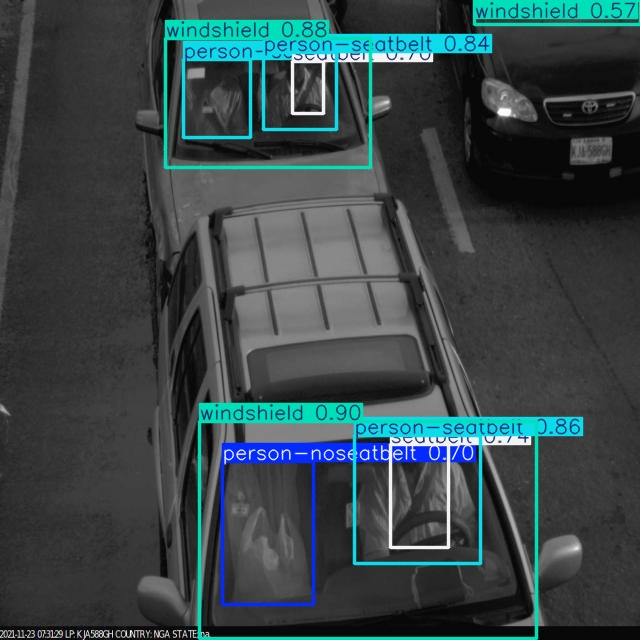

In [ ]:
results = model("/content/drive/MyDrive/TrafficLLM/Seatbelt/seat-test.jpg", conf=0.5)

for result in results:
    result.save(filename="/content/drive/MyDrive/TrafficLLM/Seatbelt/seat-out.jpg")

img = Image.open("/content/drive/MyDrive/TrafficLLM/Seatbelt/seat-out.jpg")
display(img)


image 1/1 /content/drive/MyDrive/TrafficLLM/Seatbelt/seat-test-1.jpg: 640x640 2 person-noseatbelts, 1 windshield, 37.1ms
Speed: 2.3ms preprocess, 37.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


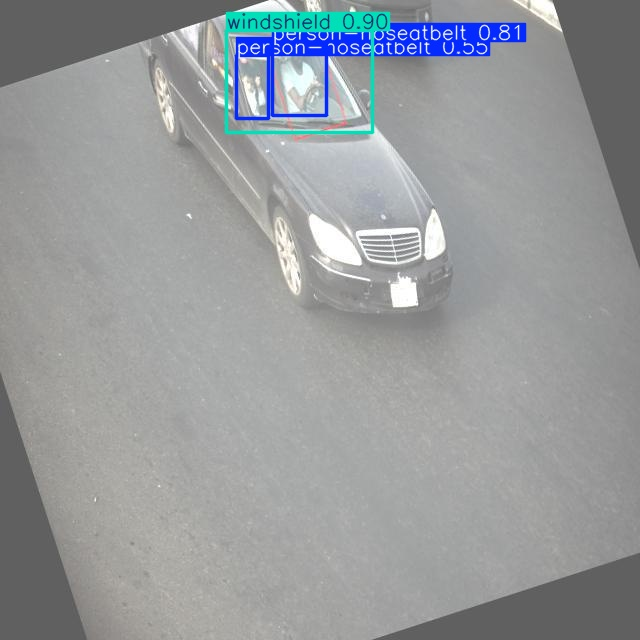

In [ ]:
results = model("/content/drive/MyDrive/TrafficLLM/Seatbelt/seat-test-1.jpg", conf=0.5)

for result in results:
    result.save(filename="/content/drive/MyDrive/TrafficLLM/Seatbelt/seat-out-1.jpg")

img = Image.open("/content/drive/MyDrive/TrafficLLM/Seatbelt/seat-out-1.jpg")
display(img)

In [ ]:
video_path = "/content/drive/MyDrive/TrafficLLM/Seatbelt/seat-video-1.mp4"

results = model.predict(source=video_path, save=True, conf=0.5, save_dir="/content/drive/MyDrive/TrafficLLM/Seatbelt/")



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/345) /content/drive/MyDrive/TrafficLLM/Seatbelt/seat-video-1.mp4: 416x640 (no detections), 66.5ms
video 1/1 (frame 2/345) /content/drive/MyDrive/TrafficLLM/Seatbelt/seat-video-1.mp4: 416x640 (no detections), 26.9ms
video 1/1 (frame 3/345) /content/drive/MyDrive/TrafficLLM/Seatbelt/seat-video-1.mp4: 416x640 (no detections), 26.9ms
video 1/1 (frame 4/345) /content/drive/MyDrive/TrafficLLM/Seatbelt/seat-video-1.mp4: 416x640 (no detectio

In [ ]:
import shutil

src_path = "/content/runs/detect/predict/seat-video-1.avi"
dest_path = "/content/drive/MyDrive/TrafficLLM/Seatbelt/output-new.avi"

shutil.move(src_path, dest_path)
print(f"Video moved to: {dest_path}")

Video moved to: /content/drive/MyDrive/TrafficLLM/Seatbelt/output-new.avi


In [ ]:
video_path_2 = "/content/drive/MyDrive/TrafficLLM/Seatbelt/seat-video.mp4"

results = model.predict(source=video_path_2, save=True, conf=0.5, save_dir="/content/drive/MyDrive/TrafficLLM/Seatbelt/")



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/750) /content/drive/MyDrive/TrafficLLM/Seatbelt/seat-video.mp4: 384x640 (no detections), 58.5ms
video 1/1 (frame 2/750) /content/drive/MyDrive/TrafficLLM/Seatbelt/seat-video.mp4: 384x640 (no detections), 25.2ms
video 1/1 (frame 3/750) /content/drive/MyDrive/TrafficLLM/Seatbelt/seat-video.mp4: 384x640 (no detections), 25.2ms
video 1/1 (frame 4/750) /content/drive/MyDrive/TrafficLLM/Seatbelt/seat-video.mp4: 384x640 (no detections), 25.

In [ ]:
src_path = "/content/runs/detect/predict/seat-video.avi"
dest_path = "/content/drive/MyDrive/TrafficLLM/Seatbelt/output-new-2.avi"

shutil.move(src_path, dest_path)
print(f"Video moved to: {dest_path}")

Video moved to: /content/drive/MyDrive/TrafficLLM/Seatbelt/output-new-2.avi



image 1/1 /content/drive/MyDrive/TrafficLLM/Seatbelt/seat-test-2.jpg: 640x640 1 person-seatbelt, 1 seatbelt, 1 windshield, 38.3ms
Speed: 4.7ms preprocess, 38.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


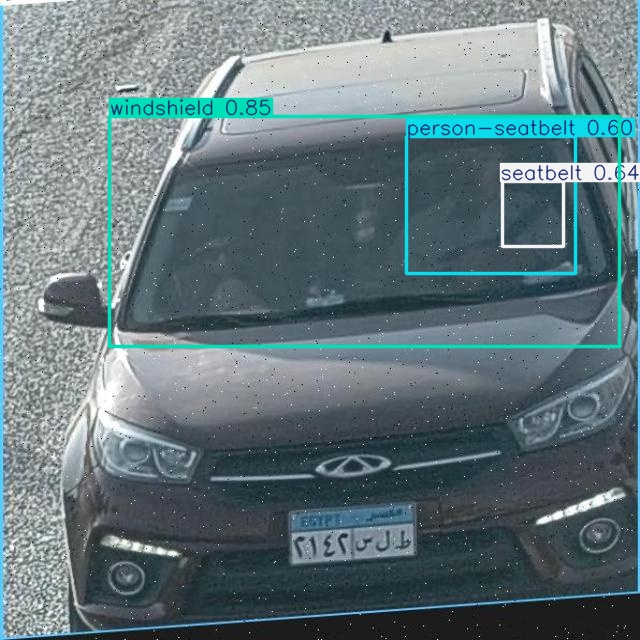

In [ ]:
results = model("/content/drive/MyDrive/TrafficLLM/Seatbelt/seat-test-2.jpg", conf=0.5)

for result in results:
    result.save(filename="/content/drive/MyDrive/TrafficLLM/Seatbelt/seat-out-2-new.jpg")

img = Image.open("/content/drive/MyDrive/TrafficLLM/Seatbelt/seat-out-2-new.jpg")
display(img)